In [1]:
import pystan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#custom
model="""
data {
  int<lower=0> N;
  int<lower=0> D;
  vector[D] X[N];
  int<lower=0,upper=1> Y[N];
}
parameters {
  vector[D] beta;
}
model {
  beta ~ normal(0, 1.0e+4);
  for (n in 1:N)
    Y[n] ~ bernoulli(inv_logit(X[n] .* beta));
}
"""

# extract data from DB to DataFrame
- ここでDataFrameにデータ入れる
- user_id, c_i1, c_i2, c_i3,,,

In [3]:
datum = np.loadtxt("women.tsv", delimiter="\t", usecols=(1, 2), skiprows=1)
weights = np.transpose(datum)[0]
heights = np.transpose(datum)[1]
y = np.array([0,0,0,0,0,0,0,1,1,1,1,1,1,1,1])

In [4]:
datum.shape[1]

2

In [5]:
datum

array([[  58.,  115.],
       [  59.,  117.],
       [  60.,  120.],
       [  61.,  123.],
       [  62.,  126.],
       [  63.,  129.],
       [  64.,  132.],
       [  65.,  135.],
       [  66.,  139.],
       [  67.,  142.],
       [  68.,  146.],
       [  69.,  150.],
       [  70.,  154.],
       [  71.,  159.],
       [  72.,  164.]])

In [6]:
fit = pystan.stan(model_code=model, data=dict(N=datum.shape[0], D=datum.shape[1], X=datum, Y=y, chains=4), iter=1000)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_894d0a3b20a60f3366b46d4e38b8cf7c NOW.


In [7]:
fit

Inference for Stan model: anon_model_894d0a3b20a60f3366b46d4e38b8cf7c.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta[0] 4.0e-3  2.1e-4 8.3e-3  -0.01-1.5e-3 4.1e-3 9.3e-3   0.02   1592    1.0
beta[1] 2.3e-3  9.7e-5 3.9e-3-5.1e-3-5.0e-4 2.3e-3 4.9e-3 9.8e-3   1569    1.0
lp__    -21.51    0.04    1.0 -24.36 -21.88 -21.21  -20.8 -20.51    685   1.01

Samples were drawn using NUTS at Mon May  8 00:21:55 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

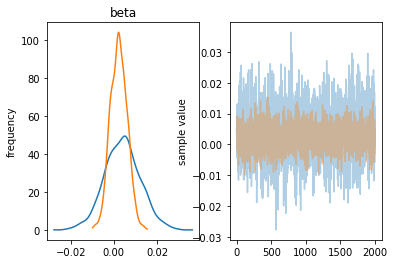

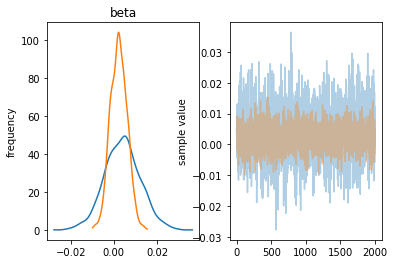

In [8]:
fit.plot()

In [12]:
samples = fit.extract(permuted=True)
alpha = np.mean(samples["alpha"])
beta = np.mean(samples["beta"])

In [13]:
samples

OrderedDict([('alpha',
              array([-82.22820262, -92.38969827, -83.37650134, ..., -90.50577089,
                     -81.99767927, -88.54256003])),
             ('beta',
              array([ 3.3617893 ,  3.5202511 ,  3.38053096, ...,  3.49791975,
                      3.36787773,  3.47229179])),
             ('sigma',
              array([ 1.88958229,  1.46308603,  1.4933092 , ...,  1.09260552,
                      1.5696753 ,  1.55110954])),
             ('lp__',
              array([-13.86421223, -13.0418492 , -13.16953399, ..., -14.2712301 ,
                     -12.93044326, -13.01552621]))])

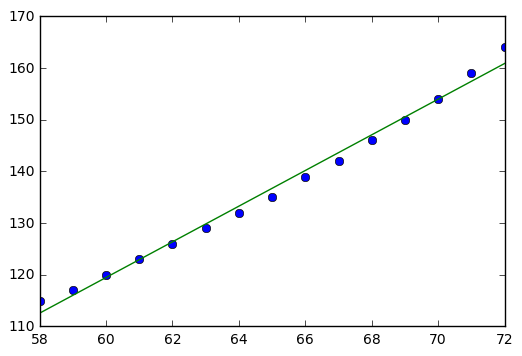

In [14]:
plt.plot(weights, heights, "o")
plt.plot(weights, alpha + beta * weights)
plt.show()